In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [3]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

C:\Users\bagwe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


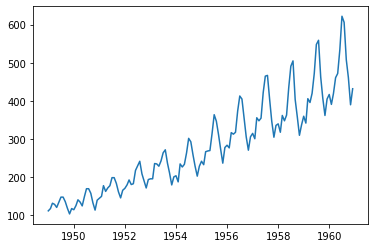

In [4]:
plt.plot(data)

## Test of stationarity

## ADF test

# p>0.05  then non-_stationary

In [19]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [58]:
data = pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv', header=0, squeeze=True,)
##series = pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv', header=0)
X =series.values
print(X)

[[112]
 [118]
 [132]
 [129]
 [121]
 [135]
 [148]
 [148]
 [136]
 [119]
 [104]
 [118]
 [115]
 [126]
 [141]
 [135]
 [125]
 [149]
 [170]
 [170]
 [158]
 [133]
 [114]
 [140]
 [145]
 [150]
 [178]
 [163]
 [172]
 [178]
 [199]
 [199]
 [184]
 [162]
 [146]
 [166]
 [171]
 [180]
 [193]
 [181]
 [183]
 [218]
 [230]
 [242]
 [209]
 [191]
 [172]
 [194]
 [196]
 [196]
 [236]
 [235]
 [229]
 [243]
 [264]
 [272]
 [237]
 [211]
 [180]
 [201]
 [204]
 [188]
 [235]
 [227]
 [234]
 [264]
 [302]
 [293]
 [259]
 [229]
 [203]
 [229]
 [242]
 [233]
 [267]
 [269]
 [270]
 [315]
 [364]
 [347]
 [312]
 [274]
 [237]
 [278]
 [284]
 [277]
 [317]
 [313]
 [318]
 [374]
 [413]
 [405]
 [355]
 [306]
 [271]
 [306]
 [315]
 [301]
 [356]
 [348]
 [355]
 [422]
 [465]
 [467]
 [404]
 [347]
 [305]
 [336]
 [340]
 [318]
 [362]
 [348]
 [363]
 [435]
 [491]
 [505]
 [404]
 [359]
 [310]
 [337]
 [360]
 [342]
 [406]
 [396]
 [420]
 [472]
 [548]
 [559]
 [463]
 [407]
 [362]
 [405]
 [417]
 [391]
 [419]
 [461]
 [472]
 [535]
 [622]
 [606]
 [508]
 [461]
 [390]

In [59]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values: ')
#for key,value in result[4].items():
 #   print('\t%s: %.3f' % (key, value))

ValueError: too many values to unpack (expected 2)

## data is non station to make it stationary take log(or sqrt)

In [24]:
series.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
d_log =  np.log(data) #take log

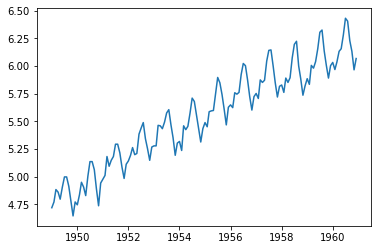

In [22]:
plt.plot(d_log)

## now sharp cycles gone

## Make Time Series Stationary : Simple Differencing

In [25]:
#create series objects
y = data['#Passengers']

In [26]:
#create a function for ADF
def adf_test(y):
    #perform augmented Dickey-Fuller test
    print('Results of Augmented Dicky-Fuller test: ')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value','# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [27]:
#apply the function to the time series
adf_test(y)

Results of Augmented Dicky-Fuller test: 
test statistic            0.815369
p-value                   0.991880
# of lags                13.000000
# of observations       130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


## first order difference


In [29]:
# difference time series
y_diff = np.diff(y)

In [30]:
adf_test(y_diff)

Results of Augmented Dicky-Fuller test: 
test statistic           -2.829267
p-value                   0.054213
# of lags                12.000000
# of observations       130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


## II log based differencing

In [33]:
data= pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [35]:
#determin rolling statistics
rolmean = data.rolling(window=12).mean()  #12 months
rolstd = data.rolling(window = 12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


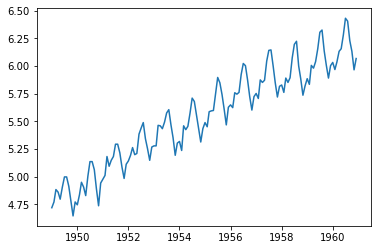

In [36]:
#take log
indexedDataset_logScale = np.log(data)
plt.plot(indexedDataset_logScale)

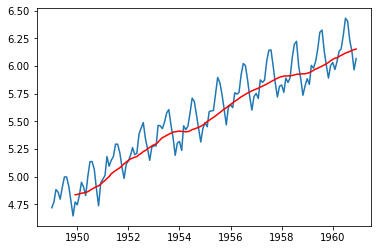

In [37]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
#movingAverage shows an upward trend

In [40]:
datasetlogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetlogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [42]:
#remove NAN values
datasetlogScaleMinusMovingAverage.dropna(inplace=True)
datasetlogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [43]:
from statsmodels.tsa.stattools import adfuller

In [49]:
def test_stationarity(timeseries):
    
    #determin rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-Fuller tes:
    print('Results of Dickey-Fuller test: ')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value','# of lags', '# of observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Values (%s)' %key] = value
    print(dfoutput)

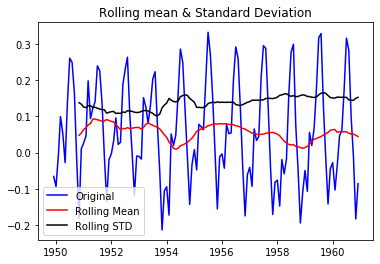

Results of Dickey-Fuller test: 
test statistic            -3.162908
p-value                    0.022235
# of lags                 13.000000
# of observations        119.000000
Critical Values (1%)      -3.486535
Critical Values (5%)      -2.886151
Critical Values (10%)     -2.579896
dtype: float64


In [51]:
test_stationarity(datasetlogScaleMinusMovingAverage)

## III Detrending

In [65]:
data= pd.read_csv('Data1\\Data1\\section 3\\AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [66]:
#fit linear model
x=[i for i in range(0, len(data))]
x=np.reshape(x, (len(x), 1))   #reshape  to 1D
y = data.values  #nos of passengers

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
#calculate trend
trend = model.predict(x)

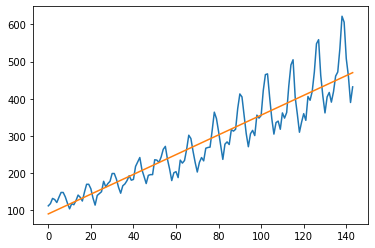

In [70]:
#plot the trend
plt.plot(y)
plt.plot(trend)
plt.show()

In [71]:
detrended = [y[i]-trend[i] for i in range(0, len(data))]

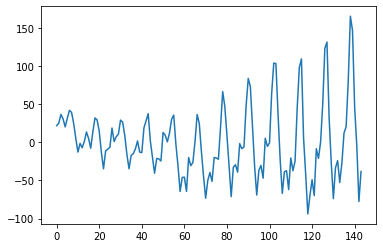

In [72]:
#plot detrended
plt.plot(detrended)
plt.show()